In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive', force_remount=True)
os.chdir('gdrive')
os.chdir('MyDrive')
os.chdir('spiders')

Mounted at /content/gdrive


In [ ]:
!pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 88.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 74.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 32.9 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.12.3
    Uninstalling tensorboard-2.12.


Loading from test
Loading images from test/Black Widow
Loading images from test/Blue Tarantula
Loading images from test/Bold Jumper
Loading images from test/Brown Grass Spider
Loading images from test/Brown Recluse Spider
Loading images from test/Deinopis Spider
Loading images from test/Golden Orb Weaver
Loading images from test/Hobo Spider
Loading images from test/Huntsman Spider
Loading images from test/Ladybird Mimic Spider
Loading images from test/Peacock Spider
Loading images from test/Red Knee Tarantula
Loading images from test/Spiny-backed Orb-weaver
Loading images from test/White Kneed Tarantula
Loading images from test/Yellow Garden Spider
Got 5.jpg
Loading from train
Loading images from train/Black Widow
Loading images from train/Blue Tarantula
Loading images from train/Bold Jumper
Loading images from train/Brown Grass Spider
Loading images from train/Brown Recluse Spider
Loading images from train/Deinopis Spider
Loading images from train/Golden Orb Weaver
Loading images fro

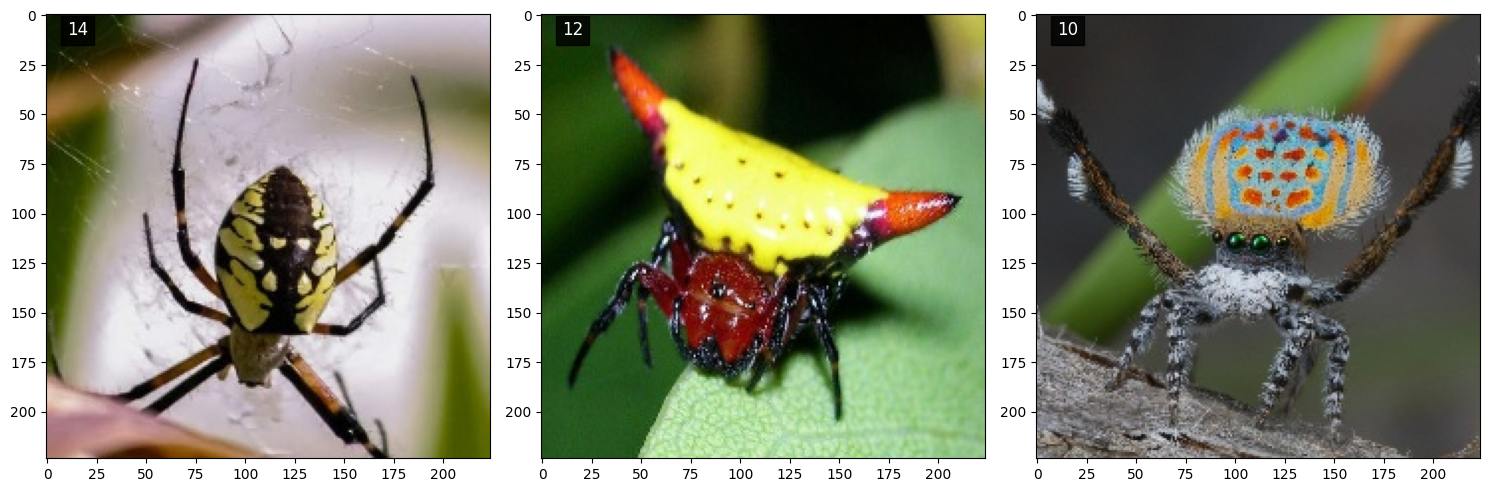


Number of instances in X: 2101
Number of instances in y: 2101
87910968/87910968 [==============================] - 0s 0us/step
Epoch 1/100
66/66 [==============================] - 76s 341ms/step - loss: 1.5417 - accuracy: 0.5707 - val_loss: 3.0709 - val_accuracy: 0.2331
Epoch 2/100
66/66 [==============================] - 15s 229ms/step - loss: 0.8410 - accuracy: 0.7130 - val_loss: 10.1282 - val_accuracy: 0.0798
Epoch 3/100
66/66 [==============================] - 16s 237ms/step - loss: 0.6738 - accuracy: 0.7630 - val_loss: 2.6752 - val_accuracy: 0.5031
Epoch 4/100
66/66 [==============================] - 16s 237ms/step - loss: 0.5353 - accuracy: 0.8196 - val_loss: 4.0453 - val_accuracy: 0.3067
Epoch 5/100
66/66 [==============================] - 16s 246ms/step - loss: 0.4224 - accuracy: 0.8515 - val_loss: 2.6128 - val_accuracy: 0.4417
Epoch 6/100
66/66 [==============================] - 17s 252ms/step - loss: 0.3742 - accuracy: 0.8634 - val_loss: 2.7758 - val_accuracy: 0.5337
Epoch 7

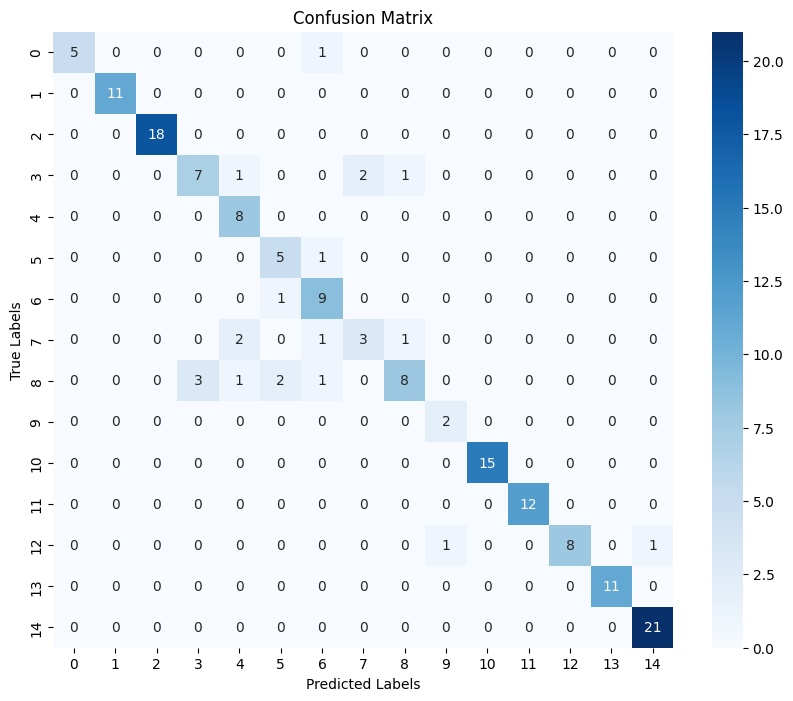

3/3 [==============================] - 1s 589ms/step - loss: 0.4942 - accuracy: 0.8451
Test Accuracy: 0.8450704216957092
3/3 [==============================] - 0s 63ms/step
Validation Classification Report:
                         precision    recall  f1-score   support

            Black Widow       1.00      0.83      0.91         6
         Blue Tarantula       1.00      1.00      1.00        11
            Bold Jumper       1.00      1.00      1.00        18
     Brown Grass Spider       0.70      0.64      0.67        11
          Brown Recluse       0.67      1.00      0.80         8
        Deinopis Spider       0.62      0.83      0.71         6
      Goldeb Orb Weaver       0.69      0.90      0.78        10
            Hobo Spider       0.60      0.43      0.50         7
        Hunstman Spider       0.80      0.53      0.64        15
  Ladybird Mimic Spider       0.67      1.00      0.80         2
         Peacock Spider       1.00      1.00      1.00        15
     Red Kne

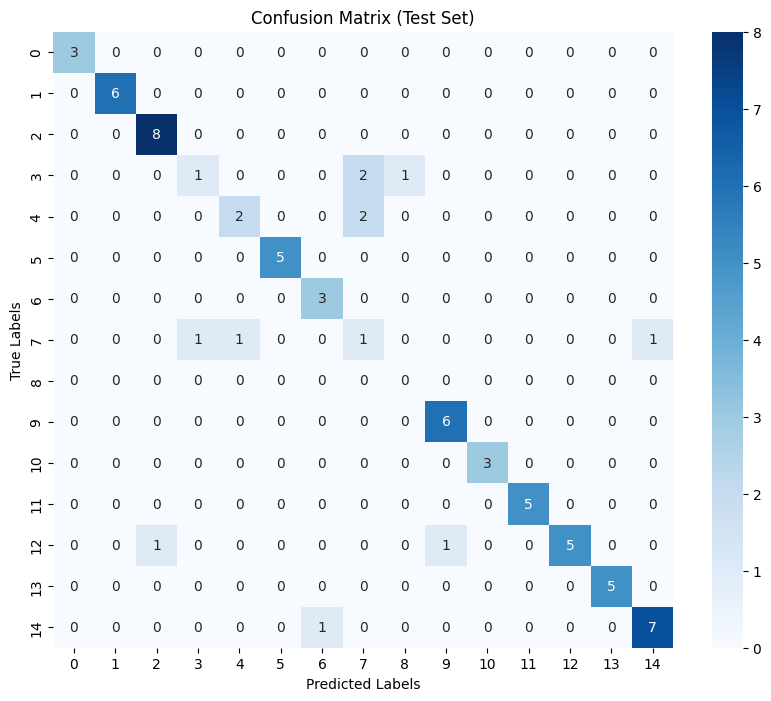

In [ ]:
import pandas as pd
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Flatten, BatchNormalization, MaxPool2D, Dropout, BatchNormalization, Activation, GlobalAveragePooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import set_random_seed
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from skimage.io import imread
import tensorflow as tf
import sys
from numpy.random import seed
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
import seaborn as sns
from keras.callbacks import EarlyStopping
seed(34)
set_random_seed(34)



def loader(directory, clas): # Loader adds images from a folder to a numpy array, as well as a label that is specified in a class hyperparameter. This works with datasets that separate classes via directories.
    caps = []
    pics = []
    print("Loading images from " + directory)
    for i in sorted(os.listdir(directory)):
      if ".jpg" in i:
          ip = imread(str(directory) + "/" + i)
          print("Got " + i, end='\r')
          pics.append(ip)
          caps.append(clas)
    return np.array(pics), np.array(caps)
imageset = []
labelset = []
imagelist = []
labellist = []

for d in sorted(os.listdir()): # Merge train/test/valid folders into one, in case we want custom splits.
  print("\nLoading from " + str(d))
  for i, t in enumerate(sorted(os.listdir(d))):
    images, labels = loader(str(d + "/" + t), i)
    imagelist.append(images)
    labellist.append(labels)
    plt.show()

# Convert lists to arrays

imageset = np.concatenate(imagelist, axis=0)
labelset = np.concatenate(labellist, axis=0)

# Split dataset

images_train, images_temp, labels_train, labels_temp = train_test_split(imageset, labelset, test_size=0.10, random_state=42)
images_valid, images_test, labels_valid, labels_test = train_test_split(images_temp, labels_temp, test_size=0.3, random_state=42)

print("\nTrain set shapes:", images_train.shape, labels_train.shape)
print("Validation set shapes:", images_valid.shape, labels_valid.shape)
print("Test set shapes:", images_test.shape, labels_test.shape)

# Show example images and class number

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

ind = 760
axes[0].imshow(images_train[ind])
axes[0].text(10, 10, labels_train[ind], fontsize=12, color='white', bbox=dict(facecolor='black', alpha=0.8))

ind = 11
axes[1].imshow(images_test[ind])
axes[1].text(10, 10, labels_test[ind], fontsize=12, color='white', bbox=dict(facecolor='black', alpha=0.8))

ind = 16
axes[2].imshow(images_valid[ind])
axes[2].text(10, 10, labels_valid[ind], fontsize=12, color='white', bbox=dict(facecolor='black', alpha=0.8))

plt.tight_layout()
plt.show()
num_classes = 15

#Onehot encode labels
ohlabels_train = to_categorical(labels_train, num_classes)
ohlabels_valid = to_categorical(labels_valid, num_classes)
ohlabels_test = to_categorical(labels_test, num_classes)


print("\nNumber of instances in X:", images_train.shape[0])
print("Number of instances in y:", labels_train.shape[0])

# InceptionV3 and final layers
base_model = InceptionV3(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(2048, activation='relu')(x)
predictions = Dense(15, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Train and evaluate

model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

# Stop when accuracy peaks
early_stopping = EarlyStopping(monitor='accuracy', patience=5, verbose=1, restore_best_weights=True, min_delta=0.005, baseline=0.9)

# data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(images_train)

# Fit model
model.fit(images_train, ohlabels_train, batch_size=32, epochs=100, validation_data=(images_valid, ohlabels_valid), callbacks=[early_stopping])

# Predict the labels for the validation data
predictions = model.predict(images_valid)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(ohlabels_valid, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
loss_val, accuracy_val = model.evaluate(images_valid, ohlabels_valid)
print("Validation Accuracy:", accuracy_val)
# Display the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(15), yticklabels=range(15))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
loss_test, accuracy_test = model.evaluate(images_test, ohlabels_test)
print("Test Accuracy:", accuracy_test)

# Predict the labels for the test data
predictions_test = model.predict(images_test)
predicted_labels_test = np.argmax(predictions_test, axis=1)
true_labels_test = np.argmax(ohlabels_test, axis=1)

# Print classification report
classification_rep_valid = classification_report(true_labels, predicted_labels, target_names=["Black Widow", "Blue Tarantula", "Bold Jumper", "Brown Grass Spider", "Brown Recluse", "Deinopis Spider", "Goldeb Orb Weaver", "Hobo Spider", "Hunstman Spider", "Ladybird Mimic Spider", "Peacock Spider", "Red Knee Tarantula", "Spiny-backed Orb Weaver", "White Kneed Tarantula", "Yellow Garden Spider"])

print("Validation Classification Report:")
print(classification_rep_valid)
# Compute the confusion matrix for the test set
conf_matrix_test = confusion_matrix(true_labels_test, predicted_labels_test)

# Display the confusion matrix for the test set as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=range(15), yticklabels=range(15))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Test Set)')
plt.show()
